In [1]:
from connattractor import analysis
import pandas as pd

In [2]:
connfile = '../data_in/connectome_partial_correlation.csv'

mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")


states, attractors, energies, statedict = analysis.simulate_activations(mtx)

100%|██████████| 1000/1000 [04:58<00:00,  3.35it/s]


In [3]:
emb = analysis.create_embeddings(states)
analysis.plot_embeddings(emb, states, c=attractors, title="Embedding of states")

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Axes: >

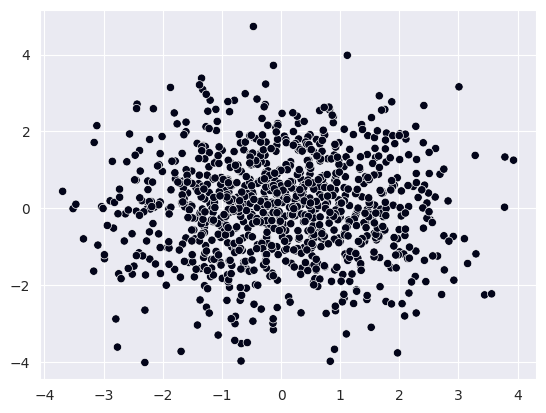

In [4]:
import seaborn as sns
emb = emb.transform(states)
sns.scatterplot(x=emb[:, 0], y=emb[:, 1], c=attractors)

In [5]:
len(statedict)

1